<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.589565,58.173330,65.297223,80.820196,0.000955,309.881269,309.879926,0.001344
1,0.0,1.0,74.209138,82.578290,28.203447,83.589763,-0.000201,278.580437,278.580946,-0.000509
2,0.0,2.0,74.440595,77.174084,87.998186,52.173688,0.000213,301.786766,301.786601,0.000164
3,0.0,3.0,59.576364,39.421436,51.066458,90.307151,0.002060,250.373468,250.369978,0.003490
4,0.0,4.0,52.408322,92.697621,74.591867,52.736995,-0.000491,282.434313,282.435096,-0.000783
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.698528,48.589961,50.996801,40.158218,0.003210,246.446716,246.443811,0.002905
119996,999.0,116.0,68.877186,68.071497,36.382901,38.584562,0.000056,221.916202,221.916510,-0.000307
119997,999.0,117.0,55.674499,22.480327,42.561396,64.924587,-0.006039,195.634770,195.640989,-0.006219
119998,999.0,118.0,54.467314,86.504460,59.801669,39.587811,0.001649,250.362904,250.361518,0.001386


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.589565,58.173330,65.297223,80.820196,0.000955,309.881269,309.879926,0.001344
1,0.0,1.0,74.209138,82.578290,28.203447,83.589763,-0.000201,278.580437,278.580946,-0.000509
2,0.0,2.0,74.440595,77.174084,87.998186,52.173688,0.000213,301.786766,301.786601,0.000164
3,0.0,3.0,59.576364,39.421436,51.066458,90.307151,0.002060,250.373468,250.369978,0.003490
4,0.0,4.0,52.408322,92.697621,74.591867,52.736995,-0.000491,282.434313,282.435096,-0.000783
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.698528,48.589961,50.996801,40.158218,0.003210,246.446716,246.443811,0.002905
119996,999.0,116.0,68.877186,68.071497,36.382901,38.584562,0.000056,221.916202,221.916510,-0.000307
119997,999.0,117.0,55.674499,22.480327,42.561396,64.924587,-0.006039,195.634770,195.640989,-0.006219
119998,999.0,118.0,54.467314,86.504460,59.801669,39.587811,0.001649,250.362904,250.361518,0.001386


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.589565  58.173330  65.297223  80.820196  0.000955  309.881269   
      1.0    74.209138  82.578290  28.203447  83.589763 -0.000201  278.580437   
      2.0    74.440595  77.174084  87.998186  52.173688  0.000213  301.786766   
      3.0    59.576364  39.421436  51.066458  90.307151  0.002060  250.373468   
      4.0    52.408322  92.697621  74.591867  52.736995 -0.000491  282.434313   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  96.698528  48.589961  50.996801  40.158218  0.003210  246.446716   
      116.0  68.877186  68.071497  36.382901  38.584562  0.000056  221.916202   
      117.0  55.674499  22.480327  42.561396  64.924587 -0.006039  195.634770   
      118.0  54.467314  86.504460  59.801669  39.587811  0.001649  250.362904   
      119.0  48.300491  78.745786  87.003310  53.635468  0.000365  277.685420   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    309.879926  0.001344  
      1.0    278.580946 -0.000509  
      2.0    301.786601  0.000164  
      3.0    250.369978  0.003490  
      4.0    282.435096 -0.000783  
...                 ...       ...  
999.0 115.0  246.443811  0.002905  
      116.0  221.916510 -0.000307  
      117.0  195.640989 -0.006219  
      118.0  250.361518  0.001386  
      119.0  277.685093  0.000326  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.589565  58.173330  65.297223  80.820196  0.000955  309.881269   
      1.0    74.209138  82.578290  28.203447  83.589763 -0.000201  278.580437   
      2.0    74.440595  77.174084  87.998186  52.173688  0.000213  301.786766   
      3.0    59.576364  39.421436  51.066458  90.307151  0.002060  250.373468   
      4.0    52.408322  92.697621  74.591867  52.736995 -0.000491  282.434313   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  96.698528  48.589961  50.996801  40.158218  0.003210  246.446716   
      116.0  68.877186  68.071497  36.382901  38.584562  0.000056  221.916202   
      117.0  55.674499  22.480327  42.561396  64.924587 -0.006039  195.634770   
      118.0  54.467314  86.504460  59.801669  39.587811  0.001649  250.362904   
      119.0  48.300491  78.745786  87.003310  53.635468  0.000365  277.685420   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    309.879926  0.001344  
      1.0    278.580946 -0.000509  
      2.0    301.786601  0.000164  
      3.0    250.369978  0.003490  
      4.0    282.435096 -0.000783  
...                 ...       ...  
999.0 115.0  246.443811  0.002905  
      116.0  221.916510 -0.000307  
      117.0  195.640989 -0.006219  
      118.0  250.361518  0.001386  
      119.0  277.685093  0.000326  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.589565,58.173330,65.297223,80.820196,0.000955,309.881269,309.879926,0.001344
1,0.0,1.0,74.209138,82.578290,28.203447,83.589763,-0.000201,278.580437,278.580946,-0.000509
2,0.0,2.0,74.440595,77.174084,87.998186,52.173688,0.000213,301.786766,301.786601,0.000164
3,0.0,3.0,59.576364,39.421436,51.066458,90.307151,0.002060,250.373468,250.369978,0.003490
4,0.0,4.0,52.408322,92.697621,74.591867,52.736995,-0.000491,282.434313,282.435096,-0.000783
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.698528,48.589961,50.996801,40.158218,0.003210,246.446716,246.443811,0.002905
119996,999.0,116.0,68.877186,68.071497,36.382901,38.584562,0.000056,221.916202,221.916510,-0.000307
119997,999.0,117.0,55.674499,22.480327,42.561396,64.924587,-0.006039,195.634770,195.640989,-0.006219
119998,999.0,118.0,54.467314,86.504460,59.801669,39.587811,0.001649,250.362904,250.361518,0.001386


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.589565  58.173330  65.297223  80.820196  0.000955  309.881269   
      1.0    74.209138  82.578290  28.203447  83.589763 -0.000201  278.580437   
      2.0    74.440595  77.174084  87.998186  52.173688  0.000213  301.786766   
      3.0    59.576364  39.421436  51.066458  90.307151  0.002060  250.373468   
      4.0    52.408322  92.697621  74.591867  52.736995 -0.000491  282.434313   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  96.698528  48.589961  50.996801  40.158218  0.003210  246.446716   
      116.0  68.877186  68.071497  36.382901  38.584562  0.000056  221.916202   
      117.0  55.674499  22.480327  42.561396  64.924587 -0.006039  195.634770   
      118.0  54.467314  86.504460  59.801669  39.587811  0.001649  250.362904   
      119.0  48.300491  78.745786  87.003310  53.635468  0.000365  277.685420   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    309.879926  0.001344  
      1.0    278.580946 -0.000509  
      2.0    301.786601  0.000164  
      3.0    250.369978  0.003490  
      4.0    282.435096 -0.000783  
...                 ...       ...  
999.0 115.0  246.443811  0.002905  
      116.0  221.916510 -0.000307  
      117.0  195.640989 -0.006219  
      118.0  250.361518  0.001386  
      119.0  277.685093  0.000326  

[120000 rows x 8 columns]

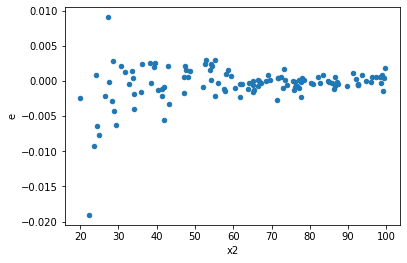

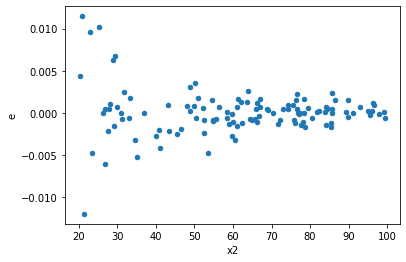

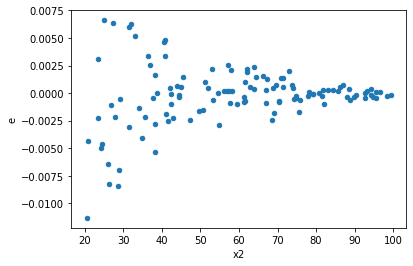

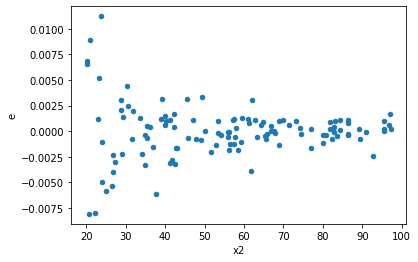

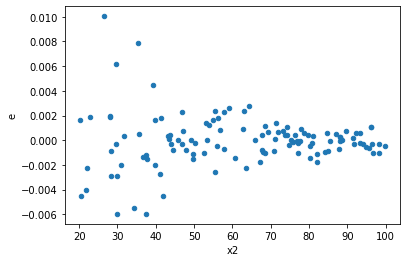

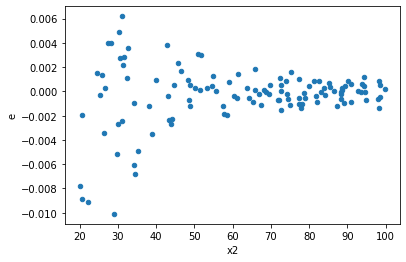

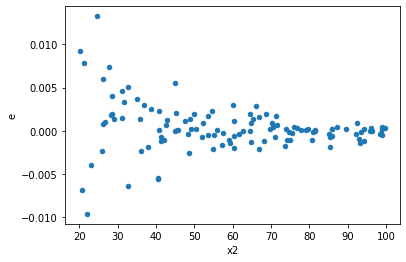

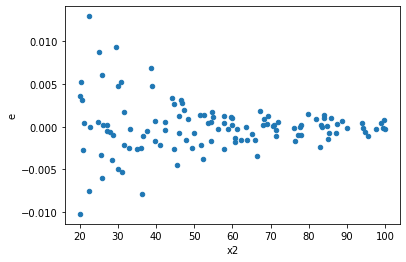

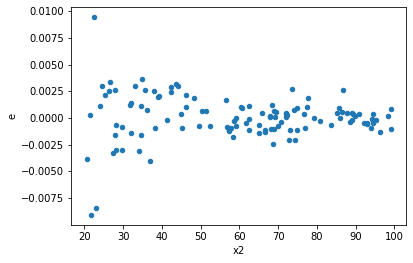

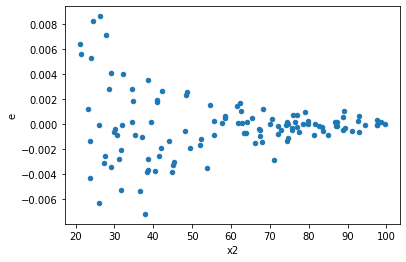

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
33.0,44.0,44.0,0.0001566456458971448,0.00018641995864860592,3.5601283158442004e-06,4.236817242013771e-06,1.1900743080405265,0.5662954046676623,0.7168522976661689,0.28314770233383113,Reject005=1 : Homoscedasticity
204.0,44.0,44.0,0.000211974667404971,0.0002261224008525471,4.817606077385704e-06,5.139145473921525e-06,1.0667425670282917,0.8312851140603092,0.5843574429698454,0.4156425570301546,Reject005=1 : Homoscedasticity
337.0,44.0,44.0,0.00017854295084206292,0.0003249296548721362,4.057794337319612e-06,7.384764883457641e-06,1.8198962957633946,0.04996078575964735,0.9750196071201763,0.024980392879823676,Reject005=0 : Heteroscedasticity
363.0,44.0,44.0,0.0002767826292380593,0.00032106264311671233,6.290514300864983e-06,7.296878252652553e-06,1.1599811881278435,0.6247084111878012,0.6876457944060994,0.3123542055939006,Reject005=1 : Homoscedasticity
366.0,44.0,44.0,0.0002236118595492802,0.0004012218317329851,5.082087717029095e-06,9.11867799393148e-06,1.794277962455577,0.05555226149162462,0.9722238692541877,0.02777613074581231,Reject005=1 : Homoscedasticity
371.0,44.0,44.0,0.00039095993446784845,0.00040102617104230203,8.885453056087465e-06,9.114231160052318e-06,1.0257474889035754,0.9331875057133199,0.5334062471433401,0.46659375285665994,Reject005=1 : Homoscedasticity
491.0,44.0,44.0,0.00022582606190084734,0.00024518793605152184,5.13241049774653e-06,5.572453092080042e-06,1.085737996702859,0.7862051260100729,0.6068974369949636,0.39310256300503643,Reject005=1 : Homoscedasticity
594.0,44.0,44.0,0.00021970091475038988,0.00039564930614123864,4.9932026079634065e-06,8.99202968502815e-06,1.8008541593499965,0.054061107829289856,0.9729694460853551,0.027030553914644928,Reject005=1 : Homoscedasticity
660.0,44.0,44.0,0.0001698801117142925,0.00044968674843656764,3.860911629870284e-06,1.0220153373558356e-05,2.647082956908217,0.0016302331610626997,0.9991848834194687,0.0008151165805313498,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,0.0005843403083661519,0.00012224219492151258,1.328046155377618e-05,2.7782317027616494e-06,0.2091969237297844,8.279126722226126e-07,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,0.0006565482112839443,0.00011066289689515171,1.492155025645328e-05,2.5150658385261754e-06,0.1685525830292639,2.9768164010213234e-08,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,0.0005193777175037701,0.00013998139979894543,1.1804039034176593e-05,3.1813954499760323e-06,0.26951753046265275,2.874155647878063e-05,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,0.00047051389707065147,0.00015777292883133355,1.0693497660696624e-05,3.585748382530308e-06,0.3353204439095296,0.0004317835781730876,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,0.00028337890736374174,0.0001839386269567041,6.440429712812313e-06,4.180423339925094e-06,0.6490907480301726,0.15566287502677542,Reject005=1 : Homoscedasticity
5.0,44.0,44.0,0.0003562581946989172,0.0001493327491843663,8.096777152248118e-06,3.393926117826507e-06,0.4191700048066857,0.004738255859791016,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,0.0006241934171808518,9.738395077573661e-05,1.418621402683754e-05,2.2132716085394685e-06,0.15601566452842117,8.53230344056881e-09,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,0.0007893232580695467,0.00010899065124622725,1.7939164956126062e-05,2.477060255596074e-06,0.1380811348607495,1.1177358676672348e-09,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,0.00020471358909798966,7.359723333050502e-05,4.652581570408856e-06,1.672664393875114e-06,0.35951317963203916,0.0009511867096505481,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    870
Reject005=1 : Homoscedasticity      130
Name: Result_test, dtype: int64